# Ensemble Classifiers: Reduced Featureset
---
Reduced featureset (18 features): ['illday', 'rash', 'redeyes', 'redplt', 'clnode',
		'redhands', 'pwbc', 'ppolys', 'pbands', 'plymphs', 'pmonos',
		'peos', 'pesr', 'pcrp', 'pplts', 'palt', 'pggt', 'zhemo']

### Pre-Training Setup (Load Reduced-Features Data)

In [1]:
import sys
sys.path.append('../') # Make parent folder visible
import numpy as np
from scipy.stats import randint

from sklearn import svm, linear_model, neighbors, ensemble, naive_bayes, \
    neural_network, tree, gaussian_process, discriminant_analysis
    
import matplotlib.pyplot as plt

from preprocess import load_data
from model_helpers.models import compute_confusion, explain_confusion, get_fc_kd_thresholds, \
    test_model, plot_cv_roc_curves, ScikitModel

/Users/lucashu/anaconda/envs/kd/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [5]:
x, y, ids = load_data.load_expanded(one_hot=False, fill_mode='mean', reduced_features=True)

### Test out Candidate Learners

In [3]:
# SVM
svm_model = ScikitModel(svm.SVC(probability=True), 
                       {
                           'C': np.logspace(-3, 3, 100),
                           'gamma': np.logspace(-3, 3, 100),
                           'kernel': ['linear', 'rbf', 'poly']
                       },
                       random_search=True,
                       n_iter=100,
                       scoring='roc_auc',
                       verbose=True)
svm_rocs = test_model(svm_model,
                      x, y,
                      allow_indeterminates=True)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.9min finished


Best params:  {'kernel': 'rbf', 'gamma': 0.0046415888336127824, 'C': 2.8480358684358018}
Best score:  0.975598980878
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  9.5min finished


Best params:  {'kernel': 'rbf', 'gamma': 0.007054802310718645, 'C': 30.538555088334185}
Best score:  0.968278109578
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  2.3min finished


Best params:  {'kernel': 'rbf', 'gamma': 0.0017475284000076829, 'C': 70.548023107186452}
Best score:  0.975402849723
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  7.2min finished


Best params:  {'kernel': 'rbf', 'gamma': 0.010722672220103232, 'C': 0.93260334688321989}
Best score:  0.968991665634
Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=1)]: Done 500 out of 500 | elapsed:  5.2min finished


Best params:  {'kernel': 'linear', 'gamma': 327.45491628777319, 'C': 0.007054802310718645}
Best score:  0.970883089698
CV Confusion:  [(106, 7, 5, 144, 12, 15), (112, 8, 5, 155, 5, 4), (91, 6, 4, 123, 27, 37), (115, 8, 6, 156, 1, 2), (90, 7, 4, 146, 27, 14)]
Best CV scores:  [ 0.9756  0.9683  0.9754  0.969   0.9709]
Avg best scores:  0.971830939102
FC Classified as FC: 514, (82.6366559486 %)
FC Classified as KD: 36, (5.78778135048 %)
KD Classified as FC: 24, (2.92682926829 %)
KD Classified as KD: 724, (88.2926829268 %)
FC left indeterminate: 72, (11.575562701 %)
KD left indeterminate: 72, (8.78048780488 %)
Avg specificity: 0.967914438503
Avg sensitivity: 0.934545454545


In [4]:
# Logistic Regression
lr_model = ScikitModel(linear_model.LogisticRegression(), 
                       params={
                           'C': np.logspace(-2, 2, 5)
                       },
                       random_search=False,
                       scoring='roc_auc',
                       verbose=True)
lr_rocs = test_model(lr_model,
                     x, y,
                     allow_indeterminates=True)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.2s finished


Best params:  {'C': 0.01}
Best score:  0.974585786227
Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params:  {'C': 0.01}
Best score:  0.967782408876


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params:  {'C': 100.0}
Best score:  0.974463743231


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params:  {'C': 0.01}
Best score:  0.968702228605


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best params:  {'C': 0.01}
Best score:  0.971804104121


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    0.1s finished


CV Confusion:  [(105, 7, 5, 140, 13, 19), (118, 8, 6, 159, 0, 0), (95, 6, 5, 114, 23, 45), (114, 8, 6, 156, 2, 2), (92, 7, 4, 147, 25, 13)]
Best CV scores:  [ 0.9746  0.9678  0.9745  0.9687  0.9718]
Avg best scores:  0.971467654212
FC Classified as FC: 524, (84.1091492777 %)
FC Classified as KD: 36, (5.77849117175 %)
KD Classified as FC: 26, (3.16686967113 %)
KD Classified as KD: 716, (87.2107186358 %)
FC left indeterminate: 63, (10.1123595506 %)
KD left indeterminate: 79, (9.62241169306 %)
Avg specificity: 0.964959568733
Avg sensitivity: 0.935714285714


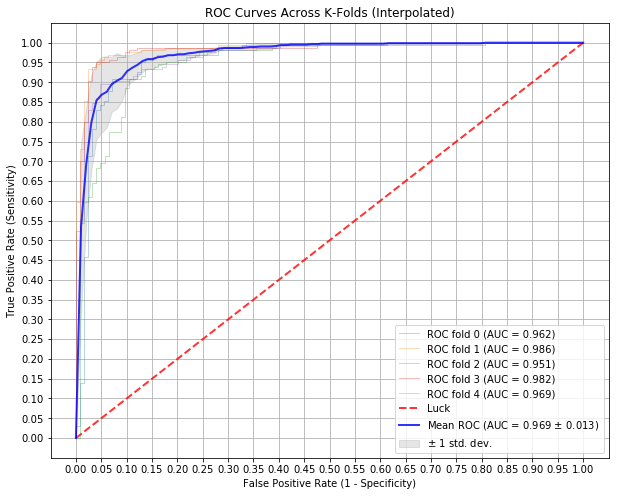

In [5]:
plot_cv_roc_curves(lr_rocs)

In [6]:
# Random Forest
rf_model = ScikitModel(ensemble.RandomForestClassifier(), 
                       params={
                           'n_estimators': randint(10, 500),
                           'max_features': randint(3, 15),
                           'min_samples_split': randint(2, 50),
                           'min_samples_leaf': randint(1, 50)
                       },
                       random_search=True,
                       n_iter=250,
                       scoring='roc_auc',
                       verbose=True)
rf_rocs = test_model(rf_model,
                     x, y,
                     allow_indeterminates=True)

Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 11.8min finished


Best params:  {'max_features': 3, 'min_samples_leaf': 8, 'min_samples_split': 39, 'n_estimators': 52}
Best score:  0.973654191859
Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 11.3min finished


Best params:  {'max_features': 3, 'min_samples_leaf': 18, 'min_samples_split': 2, 'n_estimators': 344}
Best score:  0.969943929272
Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 12.1min finished


Best params:  {'max_features': 3, 'min_samples_leaf': 16, 'min_samples_split': 8, 'n_estimators': 371}
Best score:  0.971162158717
Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 11.9min finished


Best params:  {'max_features': 3, 'min_samples_leaf': 12, 'min_samples_split': 22, 'n_estimators': 357}
Best score:  0.968666717314
Fitting 5 folds for each of 250 candidates, totalling 1250 fits


[Parallel(n_jobs=1)]: Done 1250 out of 1250 | elapsed: 11.6min finished


Best params:  {'max_features': 3, 'min_samples_leaf': 17, 'min_samples_split': 38, 'n_estimators': 102}
Best score:  0.973075249565
CV Confusion:  [(104, 7, 5, 134, 14, 25), (119, 8, 6, 158, 0, 0), (87, 7, 4, 136, 30, 24), (114, 8, 6, 155, 2, 3), (95, 6, 5, 125, 23, 34)]
Best CV scores:  [ 0.9737  0.9699  0.9712  0.9687  0.9731]
Avg best scores:  0.971300449346
FC Classified as FC: 519, (83.1730769231 %)
FC Classified as KD: 36, (5.76923076923 %)
KD Classified as FC: 26, (3.17073170732 %)
KD Classified as KD: 708, (86.3414634146 %)
FC left indeterminate: 69, (11.0576923077 %)
KD left indeterminate: 86, (10.487804878 %)
Avg specificity: 0.964577656676
Avg sensitivity: 0.935135135135


## Sklearn Ensemble Model

In [6]:
# Grid search params
from sklearn.ensemble import VotingClassifier
import xgboost as xgb

# Train voting classifier
clf1 = svm.SVC(probability=True)
clf2 = linear_model.LogisticRegression()
clf3 = xgb.XGBClassifier()

voting = VotingClassifier(
        estimators=[
            ('svm', clf1), 
            ('lr', clf2),
            ('xgb', clf3)
        ],
    voting='soft')

voting_params = {
	    'svm__C': np.logspace(-3, 2, 100),
		'svm__gamma': np.logspace(-3, 2, 100),
		'svm__kernel': ['rbf', 'poly'],
	    'lr__C': np.logspace(-3, 2, 100),
		'xgb__n_estimators': randint(50, 500),
		'xgb__max_depth': randint(3, 10),
		'xgb__learning_rate': np.logspace(-2, 0, 100),
		'xgb__min_child_weight': randint(1, 5),
		'xgb__subsample': np.logspace(-0.3, 0, 100), # (~0.5 - 1.0)
		'xgb__colsample_bytree': np.logspace(-0.3, 0, 100) # (~0.5 - 1.0)
	}

# Test model! 5-fold CV with hyperparameter optimization
clf = ScikitModel(
    voting,
    voting_params,
    random_search=True, 
    n_iter=25, 
    verbose=True)

ensemble_rocs = test_model(clf, x, y, allow_indeterminates=True, return_val='roc_curves')

Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   24.7s finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   22.2s finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   22.4s finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   28.3s finished


Fitting 5 folds for each of 25 candidates, totalling 125 fits


[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:   27.8s finished


CV Confusion:  [(102, 10, 5, 139, 13, 20), (112, 5, 4, 153, 8, 7), (108, 13, 10, 147, 3, 7), (108, 4, 2, 153, 12, 9), (87, 10, 3, 147, 27, 14)]
Avg out-of-sample ROCAUC:  0.9715444531864673
FC Classified as FC: 517, (83.11897106109325 %)
FC Classified as KD: 42, (6.752411575562702 %)
KD Classified as FC: 24, (2.9268292682926833 %)
KD Classified as KD: 739, (90.1219512195122 %)
FC left indeterminate: 63, (10.128617363344052 %)
KD left indeterminate: 57, (6.951219512195123 %)
Avg sensitivity: 0.9685452162516383
Avg specificity: 0.924865831842576


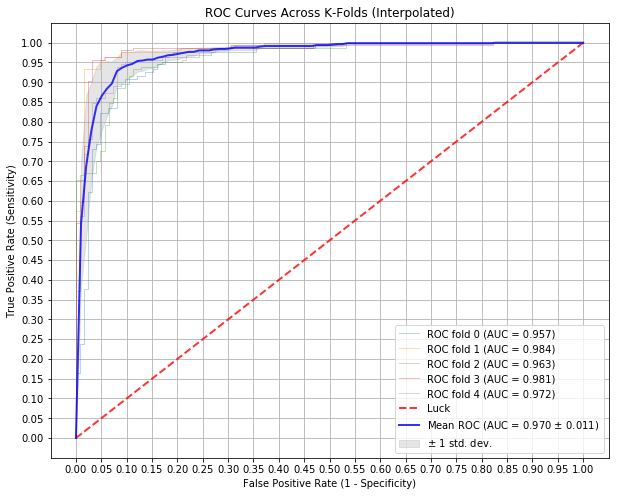

In [8]:
plot_cv_roc_curves(ensemble_rocs)